In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost
from xgboost import plot_importance
from scipy.stats import skew
from collections import OrderedDict
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('House_5_hour_heating_season.csv')

In [3]:
data = data.drop(data.loc[data['Date'] < '2019-09-30 00:00:00'].index)
df = data.drop(data.loc[data['Date'] > '2020-04-13 01:00:00'].index)

## Data Analysis 

In [4]:
# Top 5 Rows of Data 

data.head(5)

,Date,COP,flowtemp,ASHP_on,steady_state,zone1temp,zone2temp,outtemp,dewpt,Rain,rhum,msl,wdsp
0,2019-09-30 03:00:00,4.253828,34.441667,56,53.0,21.000,21.933333,8.150000,5.8,0.0,98,1009.8,5
1,2019-09-30 04:00:00,4.609576,36.800000,60,60.0,21.000,21.358333,8.016667,5.5,0.0,100,1009.9,3
2,2019-09-30 05:00:00,4.524691,36.866667,60,60.0,21.000,20.933333,8.483333,5.5,0.0,100,1009.7,4
3,2019-09-30 06:00:00,4.531674,37.008333,60,60.0,21.175,20.500000,8.766667,6.3,0.0,100,1009.5,1
4,2019-09-30 07:00:00,3.075972,43.808333,58,58.0,21.500,20.500000,7.483333,6.4,0.0,100,1009.2,2


In [5]:
# Bottom 5 Rows of Data 

data.tail(5)

,Date,COP,flowtemp,ASHP_on,steady_state,zone1temp,zone2temp,outtemp,dewpt,Rain,rhum,msl,wdsp
3303,2020-04-12 09:00:00,3.877327,38.891667,60,60.0,21.225000,21.0,9.950000,8.3,0.0,96,1014.2,3
3304,2020-04-12 10:00:00,3.644692,38.025000,58,50.0,21.500000,21.0,9.250000,8.5,0.0,96,1013.9,7
3305,2020-04-12 11:00:00,4.548469,36.183333,26,23.0,21.875000,21.0,10.400000,8.3,0.0,97,1014.1,9
3306,2020-04-12 12:00:00,2.620968,48.141667,45,42.0,22.416667,21.0,10.700000,7.9,0.0,92,1014.3,10
3307,2020-04-12 16:00:00,1.919948,45.483333,17,14.0,22.416667,20.5,12.016667,5.6,0.0,73,1014.7,14


In [6]:
# Statistical Measures of Data 

data.describe()

,COP,flowtemp,ASHP_on,steady_state,zone1temp,zone2temp,outtemp,dewpt,Rain,rhum,msl,wdsp
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,3.554537,37.536617,52.999395,47.909462,21.155847,19.983360,7.148927,3.949154,0.101119,86.214329,1008.347400,11.358222
std,0.691992,4.522780,14.443471,14.569341,0.732869,0.615297,2.880651,3.174836,0.426449,8.813922,15.884837,6.398625
min,0.142857,23.800000,1.000000,0.000000,18.075000,19.000000,0.000000,-5.400000,0.000000,48.000000,971.000000,1.000000
25%,3.117411,35.575000,58.000000,45.000000,20.758333,19.500000,5.095833,1.500000,0.000000,81.000000,998.100000,6.000000
50%,3.610243,36.800000,60.000000,53.250000,21.000000,20.000000,7.000000,3.800000,0.000000,87.000000,1007.300000,11.000000
75%,4.046770,37.393750,60.000000,58.000000,21.500000,20.058333,9.016667,6.200000,0.000000,92.000000,1019.825000,16.000000
max,5.455032,56.541667,60.000000,60.000000,25.275000,24.050000,17.950000,14.100000,5.500000,100.000000,1048.000000,35.000000


In [30]:
# Dropping Date Column as it does not contribute to the Model 

data.drop(['Date'], axis=1, inplace=True)

In [31]:
# Missing Value Analysis

data.isnull().sum()

COP             0
flowtemp        0
ASHP_on         0
steady_state    0
zone1temp       0
zone2temp       0
outtemp         0
dewpt           0
Rain            0
rhum            0
msl             0
wdsp            0
dtype: int64

<AxesSubplot:>

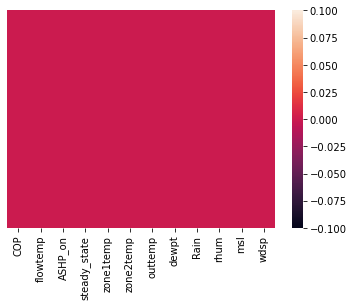

In [32]:
sns.heatmap(data.isnull(),yticklabels=False)

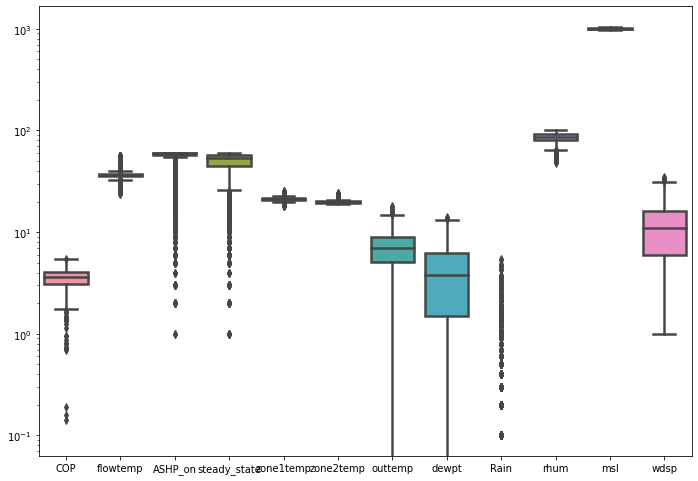

In [33]:
# Outliers Analysis

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=data,linewidth=2.5,ax=ax)
g.set_yscale("log")

From the plot, we can see that there are outliers present in all the respective columns. These outliers are however, explainable and understandable given the operation of the heat pumps at different points of the day

Following the missing value and outlier analysis, we can undertake a searborn pairplot multivariate analysis. Using multivariate analysis, we can find out relation between any two variables. Having said that, since there exist a variety of different columns, several different pairplots are created:

#### Pairplot 1:  Columns 'flowtemp', 'ASHP_on', 'steady_state'

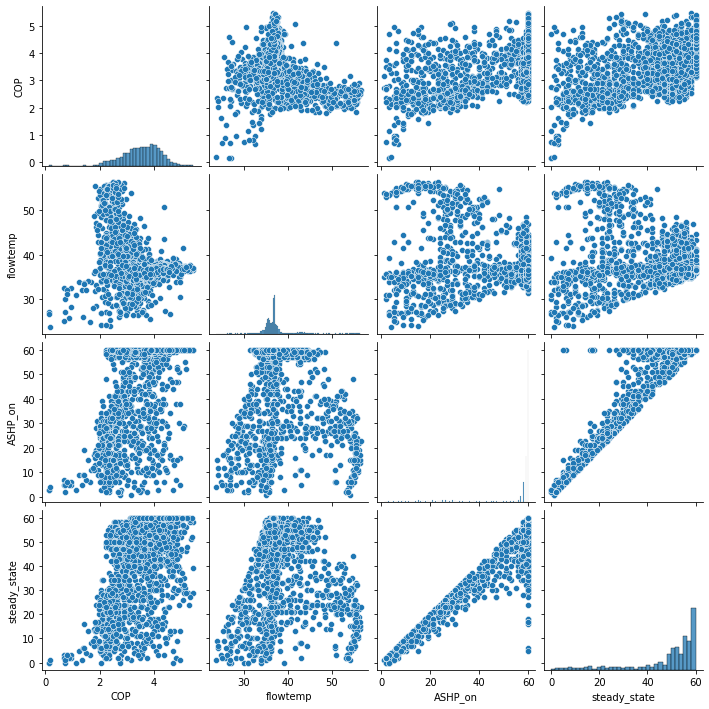

In [34]:
sns.pairplot(data, vars= ['COP', 'flowtemp', 'ASHP_on', 'steady_state'])

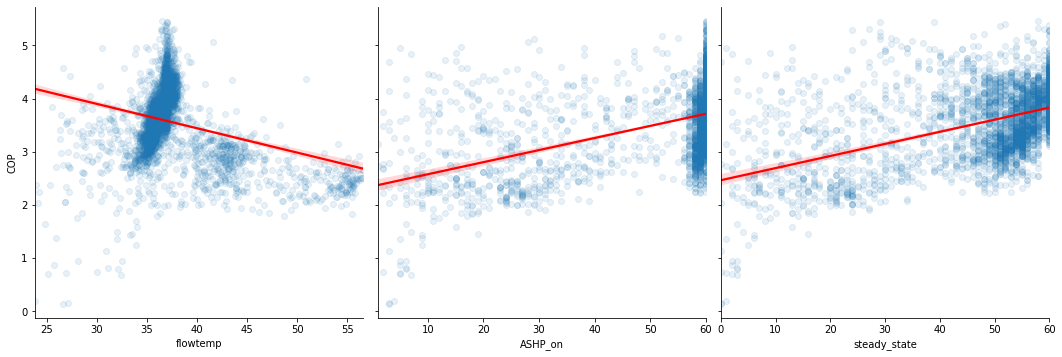

In [35]:
sns.pairplot(data, x_vars=['flowtemp', 'ASHP_on', 'steady_state'], y_vars=["COP"],
             height=5, aspect=1, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

#### Pairplot 2:  Columns 'zone1temp', 'zone2temp', 'Rain'

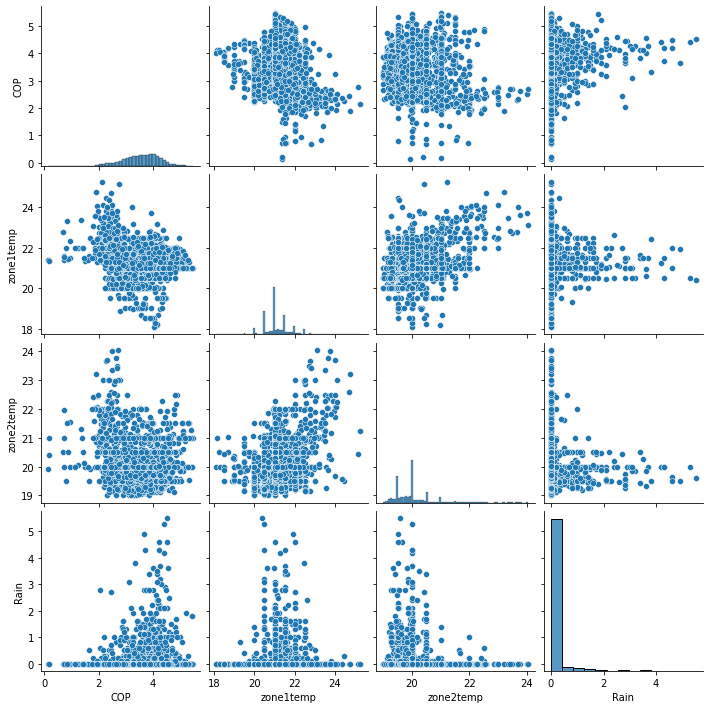

In [36]:
sns.pairplot(data, vars= ['COP', 'zone1temp', 'zone2temp', 'Rain'])

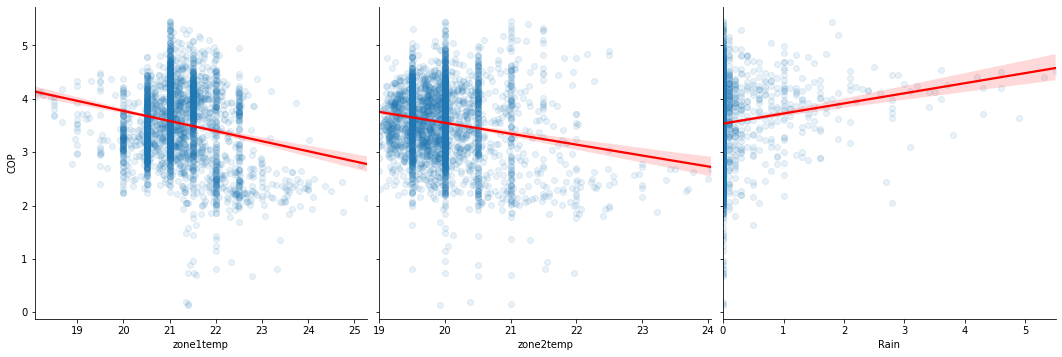

In [37]:
sns.pairplot(data, x_vars=['zone1temp', 'zone2temp', 'Rain'], y_vars=["COP"],
             height=5, aspect=1, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

#### Pairplot 3:  Columns 'outtemp', 'dewpt'

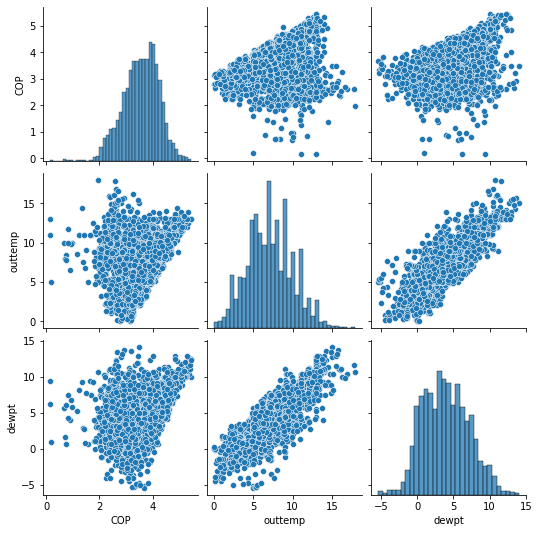

In [38]:
sns.pairplot(data, vars= ['COP', 'outtemp', 'dewpt'])

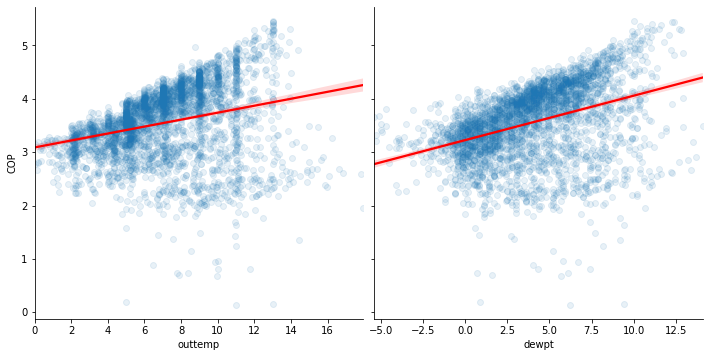

In [39]:
sns.pairplot(data, x_vars=['outtemp', 'dewpt'], y_vars=["COP"],
             height=5, aspect=1, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

#### Pairplot 4:  Columns 'msl', 'wdsp'

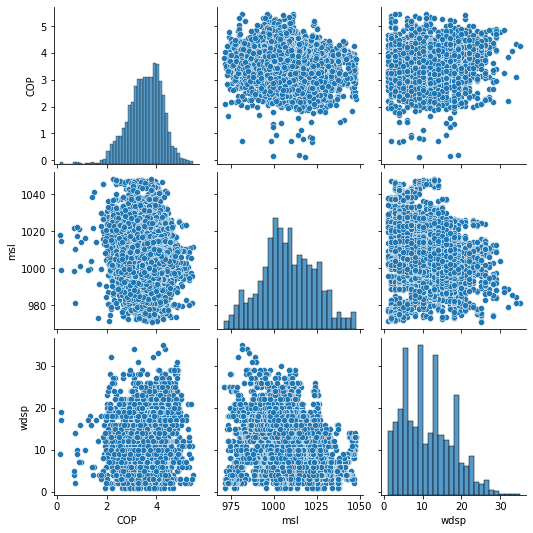

In [40]:
sns.pairplot(data, vars= ['COP', 'msl', 'wdsp'])

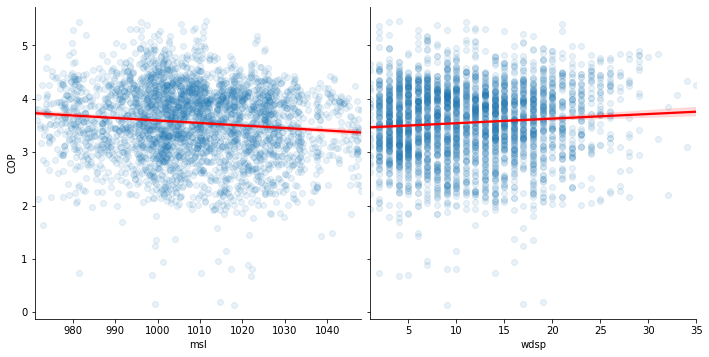

In [41]:
sns.pairplot(data, x_vars=['msl', 'wdsp'], y_vars=["COP"],
             height=5, aspect=1, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

To complement the insights received from the pairplots we can also check the corelation between the dependent and the independent features using corr() function:

In [42]:
data.corr()

,COP,flowtemp,ASHP_on,steady_state,zone1temp,zone2temp,outtemp,dewpt,Rain,rhum,msl,wdsp
COP,1.000000,-0.299505,0.474444,0.478593,-0.200076,-0.181938,0.271269,0.381971,0.116710,0.187915,-0.108096,0.079658
flowtemp,-0.299505,1.000000,-0.232190,-0.181858,0.373596,0.250865,0.286923,0.183503,-0.021111,-0.141336,0.029680,0.055304
ASHP_on,0.474444,-0.232190,1.000000,0.934568,-0.571148,-0.399861,-0.346572,-0.189821,0.011797,0.191496,-0.034869,-0.021367
steady_state,0.478593,-0.181858,0.934568,1.000000,-0.557104,-0.367536,-0.386254,-0.248882,-0.000911,0.140431,-0.033700,-0.026482
zone1temp,-0.200076,0.373596,-0.571148,-0.557104,1.000000,0.329553,0.495443,0.379478,0.037072,-0.099250,-0.044335,0.038953
zone2temp,-0.181938,0.250865,-0.399861,-0.367536,0.329553,1.000000,0.305732,0.142077,-0.058919,-0.263017,0.170246,-0.006081
outtemp,0.271269,0.286923,-0.346572,-0.386254,0.495443,0.305732,1.000000,0.857888,0.089733,-0.111850,-0.059226,0.239083
dewpt,0.381971,0.183503,-0.189821,-0.248882,0.379478,0.142077,0.857888,1.000000,0.169003,0.282211,-0.163407,0.134792
Rain,0.116710,-0.021111,0.011797,-0.000911,0.037072,-0.058919,0.089733,0.169003,1.000000,0.196268,-0.193666,0.048547
rhum,0.187915,-0.141336,0.191496,0.140431,-0.099250,-0.263017,-0.111850,0.282211,0.196268,1.000000,-0.183798,-0.291526


We can also visualize the correlation of the different features with one another using the seaborn heatmap:

In [43]:
relation =data.corr()
relation_index=relation.index

<AxesSubplot:>

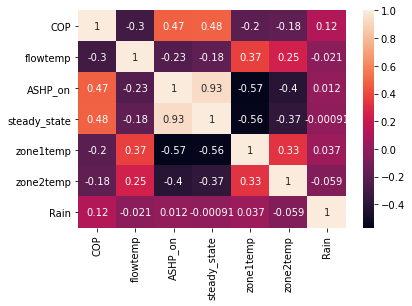

In [44]:
sns.heatmap(data[['COP', 'flowtemp', 'ASHP_on', 'steady_state', 'zone1temp', 'zone2temp', 'Rain']].corr(),annot=True)

<AxesSubplot:>

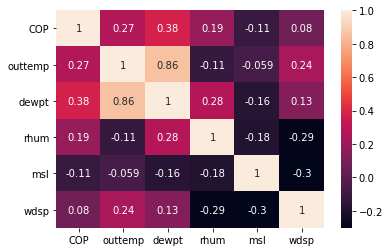

In [45]:
sns.heatmap(data[['COP', 'outtemp', 'dewpt', 'rhum', 'msl', 'wdsp']].corr(),annot=True)


## Feature Selection

In [22]:
y = data.filter(['COP'])

In [46]:
x = data.copy()
x.drop(['COP'], axis=1, inplace=True)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [48]:
# Size of train data set
X_train.shape

(2646, 11)

In [49]:
# Size of test data set
X_test.shape

(662, 11)

The principal component analysis allows us to understand which features are explaining most of the data's variance:

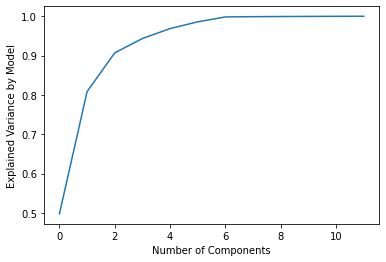

In [50]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance by Model');

In [51]:
pca = PCA(n_components=6)
pca.fit(x)
x_pca = pca.transform(x)

print("Original shape:   ", x.shape) # 11 Features 
print("Transformed shape:", x_pca.shape) # 6 Feature

Original shape:    (3308, 11)
Transformed shape: (3308, 6)


## XGBoost Modelling

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)

In [53]:
y_train.shape

(2646, 1)

In [54]:
y_test.shape

(662, 1)

In [55]:
reg_xgb = xgboost.XGBRegressor()

In [56]:
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# Use the forest's predict method on the test data
prediction = reg_xgb.predict(x_test)

## Model Evaluation

In [65]:
mae = metrics.mean_absolute_error(y_test, prediction)

In [66]:
mse = metrics.mean_squared_error(y_test, prediction)

In [67]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

In [68]:
r2 = r2_score(y_test, prediction)

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, prediction)

In [71]:
print('MAE:', round(mae,2))
print('MSE:', round(mse,2))
print('RMSE:', round(rmse,2))
print('R-Squared: ', round(r2,2))
print('MAPE: ', round(mape,2))

MAE: 0.26
MSE: 0.17
RMSE: 0.41
R-Squared:  0.64
MAPE:  0.25


## Hyper Parameter Tuning

## Training Decision Tree With Best Hyperparameters

In [96]:
tuned_xgb_model= xgboost.XGBRegressor(max_depth=7 ,max_features='sprt', 
                                      max_leaf_nodes=40, min_samples_leaf=2, 
                                      min_weight_fraction_leaf=0.1, splitter='best', 
                                      random_state=42)

In [97]:
# Fitting Tuned Model

tuned_xgb_model.fit(x_train,y_train)

[13:56:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "max_features", "max_leaf_nodes", "min_samples_leaf", "min_weight_fraction_leaf", "splitter" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             max_features='sprt', max_leaf_nodes=40, min_child_weight=1,
             min_samples_leaf=2, min_weight_fraction_leaf=0.1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, splitter='best', subsample=1,
             tree_method='exact', validate_parameters=1, ...)

##### Tuned Model Evaluation

In [98]:
tuned_prediction = tuned_xgb_model.predict(x_test)

In [99]:
tuned_mae = metrics.mean_absolute_error(y_test, tuned_prediction)

In [100]:
tuned_mse = metrics.mean_squared_error(y_test, tuned_prediction)

In [101]:
tuned_rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_prediction))

In [102]:
tuned_mape = mean_absolute_percentage_error(y_test, tuned_prediction)

In [103]:
tuned_r2 = r2_score(y_test, tuned_prediction)

In [104]:
print('MAE:', round(tuned_mae,2))
print('MSE:', round(tuned_mse,2))
print('RMSE:', round(tuned_rmse,2))
print('R-Squared: ', round(tuned_r2,2))
print('MAPE: ', round(tuned_mape,2))

MAE: 0.26
MSE: 0.17
RMSE: 0.42
R-Squared:  0.64
MAPE:  0.25
